In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle

In [ ]:
!git clone https://github.com/Ar42/ml-ai-lab.git

fatal: destination path 'ml-ai-lab' already exists and is not an empty directory.


In [ ]:
directoryOfData = "ml-ai-lab/CNN_dataset"
categoryList = ['HeadCT', 'ChestCT', 'AbdomenCT', 'Hand', 'CXR']
dataSetList = []
label = []

In [ ]:
for i, category in enumerate(categoryList):
    path = os.path.join(directoryOfData, category)
    for img in os.listdir(path):
        pathOfImage = os.path.join(path, img)
        photo = cv2.imread(pathOfImage)
        photo = cv2.cvtColor(photo, cv2.COLOR_BGR2RGB) # convert to RGB
        photo = cv2.resize(photo, (32, 32)) # resize to (224, 224)
        dataSetList.append(photo)
        label.append(i)

In [ ]:
dataSetList = np.array(dataSetList)
label = np.array(label)

In [ ]:
dataSetList, label = shuffle(dataSetList, label, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dataSetList, label, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
noOfClass = np.bincount(y_train)
maxOfCount = np.max(noOfClass)
for i, count in enumerate(noOfClass):
    if count != maxOfCount:
        mask = y_train == i
        X_train = np.concatenate((X_train, X_train[mask]), axis=0)
        y_train = np.concatenate((y_train, y_train[mask]), axis=0)


In [ ]:
X_train = X_train / 255.0
X_val = X_val / 255.0
X_test = X_test / 255.0

In [ ]:
gettingModel = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(len(categories), activation='softmax')
])

In [ ]:
gettingModel.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
narration = gettingModel.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=32)

Epoch 1/5
1799/1799 [==============================] - 104s 58ms/step - loss: 0.0105 - accuracy: 0.9969 - val_loss: 0.0071 - val_accuracy: 0.9983
Epoch 2/5
1799/1799 [==============================] - 102s 57ms/step - loss: 0.0051 - accuracy: 0.9985 - val_loss: 0.0047 - val_accuracy: 0.9986
Epoch 3/5
1799/1799 [==============================] - 101s 56ms/step - loss: 0.0048 - accuracy: 0.9987 - val_loss: 0.0058 - val_accuracy: 0.9985
Epoch 4/5
1799/1799 [==============================] - 100s 56ms/step - loss: 0.0040 - accuracy: 0.9987 - val_loss: 0.0112 - val_accuracy: 0.9967
Epoch 5/5
1799/1799 [==============================] - 99s 55ms/step - loss: 0.0033 - accuracy: 0.9990 - val_loss: 0.0035 - val_accuracy: 0.9986


In [ ]:
test_loss, test_acc = gettingModel.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 6s 19ms/step - loss: 0.0024 - accuracy: 0.9994
Test accuracy: 0.9994000196456909


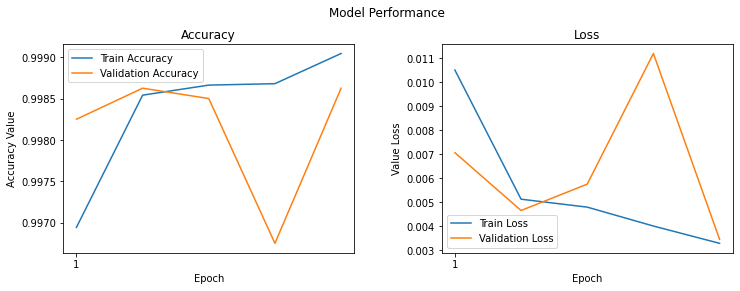

In [ ]:
f, (axisOne, axisTwo) = plt.subplots(1, 2, figsize=(12, 4))
t = f.suptitle('Model Performance', fontsize=12)
f.subplots_adjust(top=0.85, wspace=0.3)

maximumOfEpoch = len(narration.history['accuracy'])+1
listOfEpoch = list(range(1,maximumOfEpoch))
axisOne.plot(listOfEpoch, narration.history['accuracy'], label='Train Accuracy')
axisOne.plot(listOfEpoch, narration.history['val_accuracy'], label='Validation Accuracy')
axisOne.set_xticks(np.arange(1, maximumOfEpoch, 5))
axisOne.set_ylabel('Accuracy Value')
axisOne.set_xlabel('Epoch')
axisOne.set_title('Accuracy')
label1 = axisOne.legend(loc="best")

axisTwo.plot(listOfEpoch, narration.history['loss'], label='Train Loss')
axisTwo.plot(listOfEpoch, narration.history['val_loss'], label='Validation Loss')
axisTwo.set_xticks(np.arange(1, maximumOfEpoch, 5))
axisTwo.set_ylabel('Value Loss')
axisTwo.set_xlabel('Epoch')
axisTwo.set_title('Loss')
label2 = axisTwo.legend(loc="best")